## Estimación Conservadora de Estudiantes Latinoamericanos en el Reino Unido (2019/20–2023/24)

### Autor: Felipe Valencia-Clavijo

Este notebook presenta una **estimación propia del número de estudiantes latinoamericanos que viven y estudian en el Reino Unido** durante los últimos cinco años académicos.  
Dado que no se encontraron datos desagregados por país de origen directamente en las fuentes oficiales, se elaboró una estimación basada en información disponible de organismos reconocidos.

Las principales **fuentes utilizadas** fueron:

- [British Council – Reporte sobre México y América Latina](https://americas.britishcouncil.org/sites/default/files/brief_report_-_mexico.pdf), que indica que América Latina representa aproximadamente el **1 % de los estudiantes internacionales en el Reino Unido**.
- [HESA – Higher Education Student Statistics](https://www.hesa.ac.uk/news/20-03-2025/sb271-higher-education-student-statistics/location), con datos oficiales de matrículas universitarias en UK entre 2019/20 y 2023/24.

Se aplicó una estimación conservadora del **1.0 %** de estudiantes internacionales no británicos cada año como proxy para calcular el total de estudiantes latinoamericanos, incluyendo un **intervalo de confianza de ±0.2%**.

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Define HESA non-UK student data
hesa_data = {
    "Academic Year": ["2019/20", "2020/21", "2021/22", "2022/23", "2023/24"],
    "Non-UK Students": [554375, 600180, 675200, 758855, 732285],
}

# Step 2: Create DataFrame
df = pd.DataFrame(hesa_data)

# Step 3: Conservative 1% estimate
df["1.0% Estimate"] = (df["Non-UK Students"] * 0.01).round().astype(int)

# Step 4: Confidence interval of ±0.2%
margin_percent = 0.002  # ±0.2%
df["Lower Bound"] = (df["Non-UK Students"] * (0.01 - margin_percent)).round().astype(int)
df["Upper Bound"] = (df["Non-UK Students"] * (0.01 + margin_percent)).round().astype(int)

# Step 5: Prepare data for plotting
x = np.arange(len(df["Academic Year"]))
y_estimate = df["1.0% Estimate"].astype(float).values
y_lower = df["Lower Bound"].astype(float).values
y_upper = df["Upper Bound"].astype(float).values

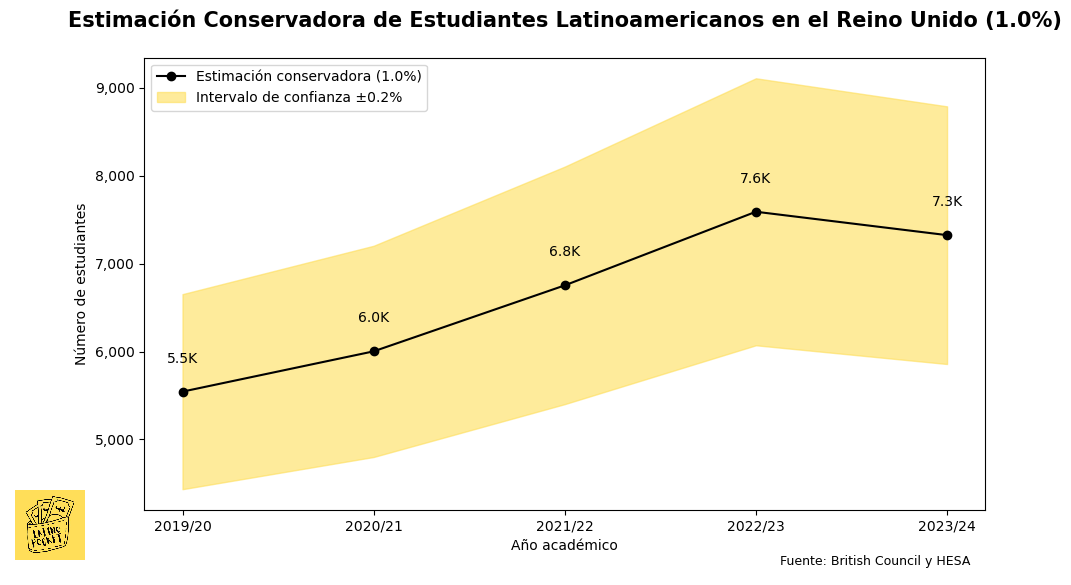

In [22]:
# Re-import the required ticker module
import matplotlib.ticker as mticker

# Re-plot with fixed ticker formatting
plt.figure(figsize=(10, 6))

# Line and confidence interval
plt.plot(x, y_estimate, marker='o', label="Estimación conservadora (1.0%)", color='black')
plt.fill_between(x, y_lower, y_upper, color='#fede59', alpha=0.6, label="Intervalo de confianza ±0.2%")

# Add data labels with one decimal and 'K'
for i, y in enumerate(y_estimate):
    plt.text(x[i], y + 300, f"{y/1000:.1f}K", ha='center', va='bottom', fontsize=10, color='black')

# Axes and labels in Spanish
plt.xticks(ticks=x, labels=df["Academic Year"])
plt.yticks(fontsize=10)
plt.tick_params(axis='y', labelsize=10)
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.title("Estimación Conservadora de Estudiantes Latinoamericanos en el Reino Unido (1.0%)\n",
          fontsize=15, fontweight='bold')
plt.xlabel("Año académico")
plt.ylabel("Número de estudiantes")
plt.legend(loc='upper left', fontsize=10)

# Remove grid lines
plt.grid(False)

# Add source note in Spanish, right aligned at bottom
plt.figtext(0.97, 0.05, "Fuente: British Council y HESA",
            wrap=True, horizontalalignment='right', fontsize=9)

# Optional: Add logo (currently commented out)
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import matplotlib.image as mpimg
logo_path = "logo.jpg"
logo_img = mpimg.imread(logo_path)
imagebox = OffsetImage(logo_img, zoom=0.1)
ab = AnnotationBbox(imagebox, (0.05, 0.1), frameon=False, xycoords='figure fraction')  # bottom left
plt.gca().add_artist(ab)

plt.tight_layout()

# Save figure as PNG for research paper
plt.savefig("est_estudiantes_latam_uk.png", dpi=300, bbox_inches='tight', transparent=False)

plt.show()


